In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [30]:
df = pd.read_csv('https://drive.google.com/uc?id=1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y')

In [31]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [33]:
df.columns = df.columns.str.strip()
bp_before = df['Blood Pressure Before (mmHg)']
bp_after = df['Blood Pressure After (mmHg)']


In [36]:
# a. Dispersion
range_before = np.max(bp_before) - np.min(bp_before)
range_after= np.max(bp_after) - np.min(bp_after)

std_dev_before = np.std(bp_before)
std_dev_after = np.std(bp_after)

In [37]:
print("Dispersion : ")
print("Blood Pressure Before - Range" , range_before)
print("Blood Pressure Before - Standard Deviation" , std_dev_before)
print("Blood Pressure after - Range" , range_after)
print("Blood Pressure after - Standard Deviation" , std_dev_after)


Dispersion : 
Blood Pressure Before - Range 28
Blood Pressure Before - Standard Deviation 6.5652037287505385
Blood Pressure after - Range 23
Blood Pressure after - Standard Deviation 6.853495458523338


In [38]:
# b. Calculate mean and 5% confidence interval and plot it
mean_before = np.mean(bp_before)
mean_after = np.mean(bp_after)

n = len(data)
se_before = std_dev_before / np.sqrt(n)
se_after = std_dev_after / np.sqrt(n)

In [39]:
t_critical = t.ppf(0.975, df=n-1)

In [40]:
ci_before = (mean_before - t_critical * se_before, mean_before + t_critical * se_before)
ci_after = (mean_after - t_critical * se_after, mean_after + t_critical * se_after)


In [41]:
print("\nMean and Confidence Interval (95%):")
print("Blood Pressure Before - Mean:", mean_before)
print("Blood Pressure Before - Confidence Interval:", ci_before)
print("Blood Pressure After - Mean:", mean_after)
print("Blood Pressure After - Confidence Interval:", ci_after)


Mean and Confidence Interval (95%):
Blood Pressure Before - Mean: 133.91
Blood Pressure Before - Confidence Interval: (132.71821029851785, 135.10178970148215)
Blood Pressure After - Mean: 128.36
Blood Pressure After - Confidence Interval: (127.11587633772074, 129.6041236622793)


In [42]:
# Plotting
labels = ['Blood Pressure Before', 'Blood Pressure After']
means = [mean_before, mean_after]
cis = [ci_before, ci_after]


In [43]:
x = np.arange(len(labels))
width = 0.35


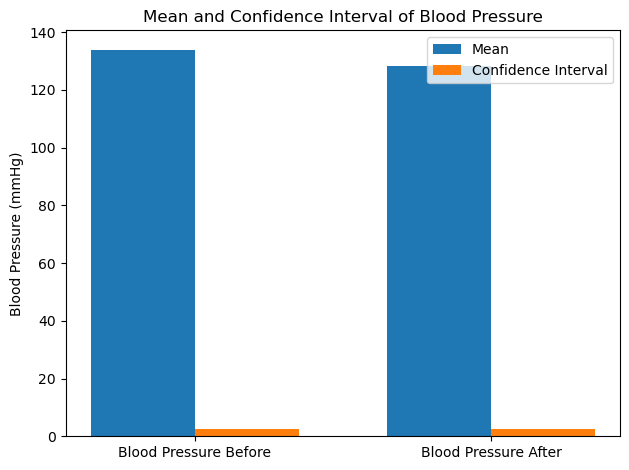

In [44]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Mean')
rects2 = ax.bar(x + width/2, [ci[1] - ci[0] for ci in cis], width, label='Confidence Interval')

ax.set_ylabel('Blood Pressure (mmHg)')
ax.set_title('Mean and Confidence Interval of Blood Pressure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [45]:
mad_before = np.mean(np.abs(bp_before - mean_before))
mad_after = np.mean(np.abs(bp_after - mean_after))

In [46]:
print("\nMean Absolute Deviation (MAD) and Standard Deviation (SD):")
print("Blood Pressure Before - MAD:", mad_before)
print("Blood Pressure Before - Standard Deviation:", std_dev_before)
print("Blood Pressure After - MAD:", mad_after)
print("Blood Pressure After - Standard Deviation:", std_dev_after)


Mean Absolute Deviation (MAD) and Standard Deviation (SD):
Blood Pressure Before - MAD: 5.7118
Blood Pressure Before - Standard Deviation: 6.5652037287505385
Blood Pressure After - MAD: 5.9
Blood Pressure After - Standard Deviation: 6.853495458523338


In [48]:
# d. Calculate the correlation coefficient and check significance at 1% level
correlation_coefficient = np.corrcoef(bp_before, bp_after)[0, 1]
degrees_of_freedom = n - 2


t_critical_1p = t.ppf(0.995, df=degrees_of_freedom)


se_corr_coeff = 1 / np.sqrt(degrees_of_freedom)

t_statistic = correlation_coefficient / se_corr_coeff


is_significant = np.abs(t_statistic) > t_critical_1p

In [50]:
print("\nCorrelation Coefficient:")
print("Correlation Coefficient:", correlation_coefficient)
print("Significance at 1% level:", is_significant)



Correlation Coefficient:
Correlation Coefficient: 0.9779485966556016
Significance at 1% level: True
